## Functional Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 1. Simple Linear Regression

### Data 만들기

In [7]:
def dataset(train_size=100): # tensorflow
     tf.random.set_seed(1)
     x = tf.linspace(0.0, 10.0, num=train_size)
     y = 3.0*x - 10.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 2.0)
     return x, y
x, y_true = dataset(20)

### Model 만들기

In [8]:
inputs = tf.keras.layers.Input(shape=(1,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(1,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
inputs = tf.keras.layers.Input(shape=(1,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(1,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 학습 시키기
+ learning_rate 변경
+ optimizer 변경 (RMSprop, adagrad, SGD, Adam)
+ batch_size 변경

In [10]:
model.summary()
##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)  # 'rmsprop'
model.compile(optimizer=opt, loss='mse')  # 'mean_squared_error'

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
ret = model.fit(x, y_true, epochs=100, batch_size=4, verbose=2) #2: one line per epoch
print("len(model.layers):", len(model.layers)) # 2

Epoch 1/100
5/5 - 0s - loss: 211.6627 - 187ms/epoch - 37ms/step
Epoch 2/100
5/5 - 0s - loss: 116.9469 - 0s/epoch - 0s/step
Epoch 3/100
5/5 - 0s - loss: 81.7406 - 16ms/epoch - 3ms/step
Epoch 4/100
5/5 - 0s - loss: 62.5427 - 0s/epoch - 0s/step
Epoch 5/100
5/5 - 0s - loss: 54.0302 - 0s/epoch - 0s/step
Epoch 6/100
5/5 - 0s - loss: 48.7080 - 16ms/epoch - 3ms/step
Epoch 7/100
5/5 - 0s - loss: 44.0260 - 0s/epoch - 0s/step
Epoch 8/100
5/5 - 0s - loss: 42.5232 - 0s/epoch - 0s/step
Epoch 9/100
5/5 - 0s - loss: 38.7893 - 0s/epoch - 0s/step
Epoch 10/100
5/5 - 0s - loss: 36.9615 - 0s/epoch - 0s/step
Epoch 11/100
5/5 - 0s - loss: 35.2012 - 0s/epoch - 0s/step
Epoch 12/100
5/5 - 0s - loss: 33.3122 - 0s/epoch - 0s/step
Epoch 13/100
5/5 - 0s - loss: 31.8285 - 0s/epoch - 0s/step
Epoch 14/100
5/5 - 0s - loss: 29.6781 - 0s/epoch - 0s/step
Epoch 15/100
5/5 - 0s - loss: 27.6764 - 0s/epoch - 0s/step
Epoch 16/100
5/5 - 0s - loss: 26.6424 - 16ms/epoch - 3ms/step
Epoch 17/100
5/5 - 0s - loss: 25.6228 - 0s/epoch 

### 결과값 확인

In [12]:
loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights, bias
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

loss: 2.3745005130767822
weights: [[3.1796675]]
bias: [-10.979975]


### 시각화

1/1 [==============================] - 0s 47ms/step


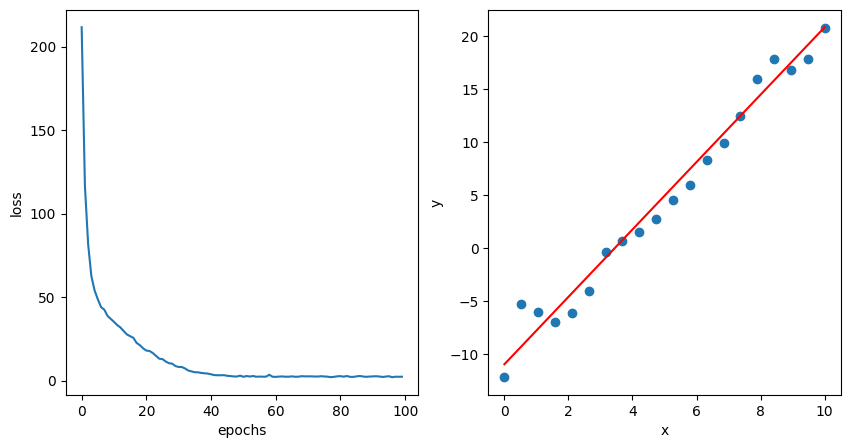

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(loss)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].scatter(x, y_true)
y_pred = model.predict(x)
axs[1].plot(x, y_pred, color='red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

## 2. Linear Regression with two variables
+ [ 2 x 2 ] [ 2 x 1 ] = [ 2 x 1 ]

### Data 만들기
+ data에 따라 결과 달라지는거 확인

In [14]:
train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1))

### Model 만들기

In [15]:
inputs = tf.keras.layers.Input(shape=(2,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(2,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### 학습시키기

In [16]:
##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

In [17]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2) # 2: one line per epoch
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 2

Epoch 1/100
2/2 - 0s - loss: 28.4482 - 156ms/epoch - 78ms/step
Epoch 2/100
2/2 - 0s - loss: 12.7128 - 0s/epoch - 0s/step
Epoch 3/100
2/2 - 0s - loss: 7.0903 - 0s/epoch - 0s/step
Epoch 4/100
2/2 - 0s - loss: 4.3500 - 16ms/epoch - 8ms/step
Epoch 5/100
2/2 - 0s - loss: 2.9198 - 0s/epoch - 0s/step
Epoch 6/100
2/2 - 0s - loss: 2.2181 - 0s/epoch - 0s/step
Epoch 7/100
2/2 - 0s - loss: 1.9103 - 0s/epoch - 0s/step
Epoch 8/100
2/2 - 0s - loss: 1.6318 - 0s/epoch - 0s/step
Epoch 9/100
2/2 - 0s - loss: 1.4677 - 0s/epoch - 0s/step
Epoch 10/100
2/2 - 0s - loss: 1.3862 - 0s/epoch - 0s/step
Epoch 11/100
2/2 - 0s - loss: 1.2564 - 0s/epoch - 0s/step
Epoch 12/100
2/2 - 0s - loss: 1.1405 - 0s/epoch - 0s/step
Epoch 13/100
2/2 - 0s - loss: 1.0874 - 16ms/epoch - 8ms/step
Epoch 14/100
2/2 - 0s - loss: 0.9172 - 0s/epoch - 0s/step
Epoch 15/100
2/2 - 0s - loss: 0.8790 - 0s/epoch - 0s/step
Epoch 16/100
2/2 - 0s - loss: 0.6906 - 0s/epoch - 0s/step
Epoch 17/100
2/2 - 0s - loss: 0.6670 - 0s/epoch - 0s/step
Epoch 18/1

### 결과값 확인

In [19]:
loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

loss: 0.002023575361818075
weights: [[1.003804 ]
 [1.9888246]]
bias: [2.9620252]


### 시각화

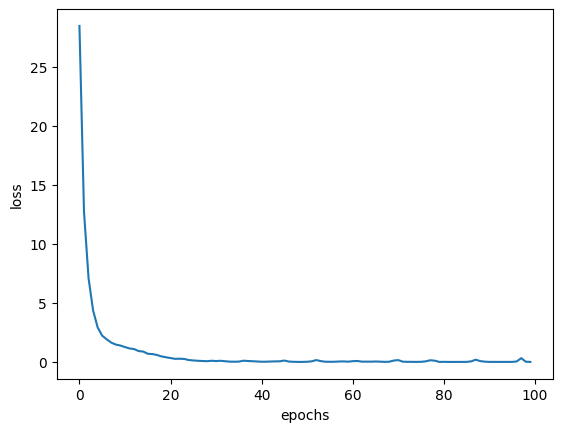

In [20]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## 3. Polynomial Regression

### DATA 만들기

In [21]:
def dataset(train_size=100): # tensorflow
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

In [22]:
# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

### Model 만들기

In [23]:
inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 학습 시키기

In [25]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

In [26]:
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 2

Epoch 1/100
1/1 - 0s - loss: 41968.4766 - 172ms/epoch - 172ms/step
Epoch 2/100
1/1 - 0s - loss: 34795.1562 - 0s/epoch - 0s/step
Epoch 3/100
1/1 - 0s - loss: 30240.2871 - 0s/epoch - 0s/step
Epoch 4/100
1/1 - 0s - loss: 26786.2188 - 0s/epoch - 0s/step
Epoch 5/100
1/1 - 0s - loss: 23971.6836 - 0s/epoch - 0s/step
Epoch 6/100
1/1 - 0s - loss: 21587.0469 - 0s/epoch - 0s/step
Epoch 7/100
1/1 - 0s - loss: 19516.9629 - 0s/epoch - 0s/step
Epoch 8/100
1/1 - 0s - loss: 17690.2812 - 0s/epoch - 0s/step
Epoch 9/100
1/1 - 0s - loss: 16059.6074 - 0s/epoch - 0s/step
Epoch 10/100
1/1 - 0s - loss: 14591.5781 - 0s/epoch - 0s/step
Epoch 11/100
1/1 - 0s - loss: 13261.7002 - 0s/epoch - 0s/step
Epoch 12/100
1/1 - 0s - loss: 12051.3799 - 0s/epoch - 0s/step
Epoch 13/100
1/1 - 0s - loss: 10946.1230 - 0s/epoch - 0s/step
Epoch 14/100
1/1 - 0s - loss: 9934.3691 - 0s/epoch - 0s/step
Epoch 15/100
1/1 - 0s - loss: 9006.7031 - 0s/epoch - 0s/step
Epoch 16/100
1/1 - 0s - loss: 8155.3350 - 16ms/epoch - 16ms/step
Epoch 17/1

### 결과값 확인

In [27]:
loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

loss: 423.2019958496094
weights: [[-7.268168 ]
 [ 4.347743 ]
 [ 2.7314148]
 [ 2.904482 ]]


### 시각화

1/1 [==============================] - 0s 24ms/step


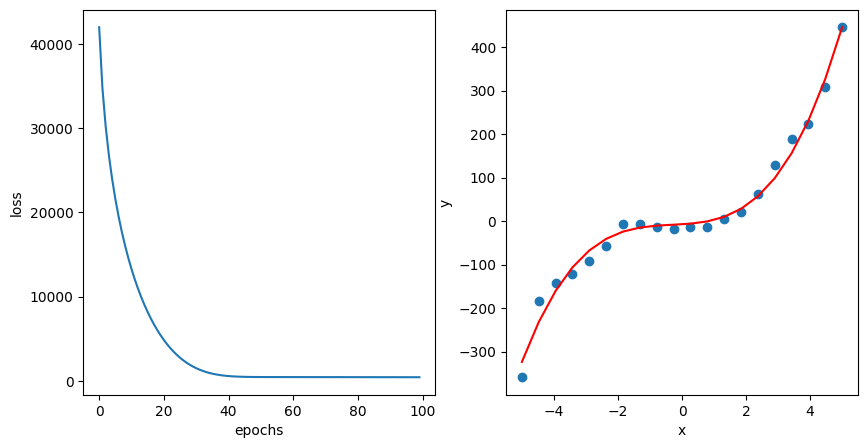

In [28]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(loss)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].scatter(x, y_true)
y_pred = model.predict(X)
axs[1].plot(x, y_pred, color='red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

## Model Save and Load

In [32]:
#1: 모델 전체 저장
import os
if not os.path.exists("./RES"):
     os.mkdir("./RES")
model.save("./RES/1401.h5")   # HDF5, keras format

#2: 모델 구조 저장
json_string = model.to_json()
import json
file = open("./RES/1401.model", 'w')
json.dump(json_string, file)
file.close()

#3: 가중치 저장
model.save_weights("./RES/weights/1401")

#4: 학습중에 체크포인트 저장
filepath = "RES/ckpt/1401-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
              filepath, verbose=0, save_weights_only=True, save_freq=5) # 저장 주기
ret = model.fit(X, y_true, epochs=100, callbacks = [cp_callback], verbose=0)

In [33]:
def create_checkpoint_callback(path, monitor='loss',\
                               save_best_only=True,\
                               save_weights_only=False,\
                               save_freq='epoch', **kargs):
  import os
  checkpoint_path = path
  checkpoint_dir = os.path.dirname(checkpoint_path)

  # Create a callback that saves the model's weights
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  monitor=monitor,
                                                  save_best_only = save_best_only,
                                                  save_weights_only=save_weights_only,
                                                  verbose=1)
  return cp_callback

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = create_checkpoint_callback(checkpoint_path)

In [34]:
train(model, X, y_true, epochs=60, callbacks=[cp_callback])

In [35]:
os.listdir(checkpoint_dir)